In [1]:
# Análisis Exploratorio de Datos de la Calculadora Avanzada
# Carga y visualización de archivos .pkl

# Importar librerías necesarias
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

# Configuración visual
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [4]:
# Función para cargar archivo pickle
def cargar_archivo_pkl(ruta_archivo):
    try:
        with open(ruta_archivo, 'rb') as archivo:
            datos = pickle.load(archivo)
        print(f"✅ Archivo cargado correctamente: {ruta_archivo}")
        return datos
    except Exception as e:
        print(f"❌ Error al cargar el archivo: {str(e)}")
        return None

# Ruta del archivo pickle (ajusta la ruta según donde hayas guardado tu archivo)
ruta_archivo = "backups_admin/user_all_20250331_182415.pkl"  # Cambia esto a la ruta de tu archivo

# Cargar datos
datos = cargar_archivo_pkl(ruta_archivo)

# Información básica sobre los datos cargados
if datos:
    print(f"\nTipo de datos: {type(datos)}")
    
    if isinstance(datos, dict):
        print("\nClaves disponibles en el diccionario:")
        for clave in datos.keys():
            print(f"- {clave}")
    elif isinstance(datos, list):
        print(f"\nNúmero de registros: {len(datos)}")
        if len(datos) > 0:
            print("\nPrimer registro:")
            print(datos[0])
    else:
        print("Tipo de datos no reconocido para análisis automático.")

✅ Archivo cargado correctamente: backups_admin/user_all_20250331_182415.pkl

Tipo de datos: <class 'dict'>

Claves disponibles en el diccionario:
- operaciones
- usuarios
- historial
- fecha_backup


In [5]:
# Convertir datos a DataFrame para facilitar su análisis
def convertir_a_dataframe(datos):
    if isinstance(datos, pd.DataFrame):
        return datos  # Ya es un DataFrame
    
    if isinstance(datos, list) and len(datos) > 0:
        # Si es una lista de diccionarios
        if isinstance(datos[0], dict):
            return pd.DataFrame(datos)
    
    if isinstance(datos, dict):
        # Intentar diferentes estrategias según la estructura
        if 'operaciones' in datos and isinstance(datos['operaciones'], list):
            return pd.DataFrame(datos['operaciones'])
        
        # Intentar aplanar el diccionario si tiene estructura anidada
        try:
            df = pd.DataFrame(datos)
            return df
        except:
            print("No se pudo convertir el diccionario directamente a DataFrame")
    
    print("❌ No se pudo convertir los datos a DataFrame")
    return None

# Convertir a DataFrame
df = convertir_a_dataframe(datos)

# Mostrar las primeras filas si el DataFrame se creó correctamente
if df is not None:
    print("\n🔍 Primeras filas del DataFrame:")
    display(df.head())
    
    print("\n📊 Información del DataFrame:")
    display(df.info())
    
    print("\n📝 Resumen estadístico:")
    display(df.describe())
else:
    print("❌ No se pudo realizar el análisis porque los datos no se pudieron convertir a DataFrame")


🔍 Primeras filas del DataFrame:


,operacion_id,usuario_id,usuario,operando1,operador,operando2,resultado,operacion_creado_en
0,1,2,profesor,10.0,-,5.0,5.0,2025-03-28 01:08:47.028957
1,2,1,admin,2.0,+,2.0,4.0,2025-03-28 01:12:58.324156
2,3,1,admin,2.0,*,3.0,6.0,2025-03-28 01:13:11.899403
3,4,2,profesor,3.0,+,3.0,6.0,2025-03-28 01:20:36.192123
4,5,1,admin,24.0,/,2.0,12.0,2025-03-28 01:39:44.348968



📊 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   operacion_id         14 non-null     int64         
 1   usuario_id           14 non-null     int64         
 2   usuario              14 non-null     object        
 3   operando1            14 non-null     object        
 4   operador             14 non-null     object        
 5   operando2            14 non-null     object        
 6   resultado            14 non-null     object        
 7   operacion_creado_en  14 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.0+ KB


None


📝 Resumen estadístico:


,operacion_id,usuario_id,operacion_creado_en
count,14.0000,14.000000,14
mean,7.5000,2.000000,2025-03-28 18:12:58.729132032
min,1.0000,1.000000,2025-03-28 01:08:47.028957
25%,4.2500,1.000000,2025-03-28 01:25:23.231334144
50%,7.5000,1.500000,2025-03-28 01:57:07.047374848
75%,10.7500,3.000000,2025-03-28 21:07:00.383885312
max,14.0000,4.000000,2025-03-31 16:46:53.563094
std,4.1833,1.176697,NaN


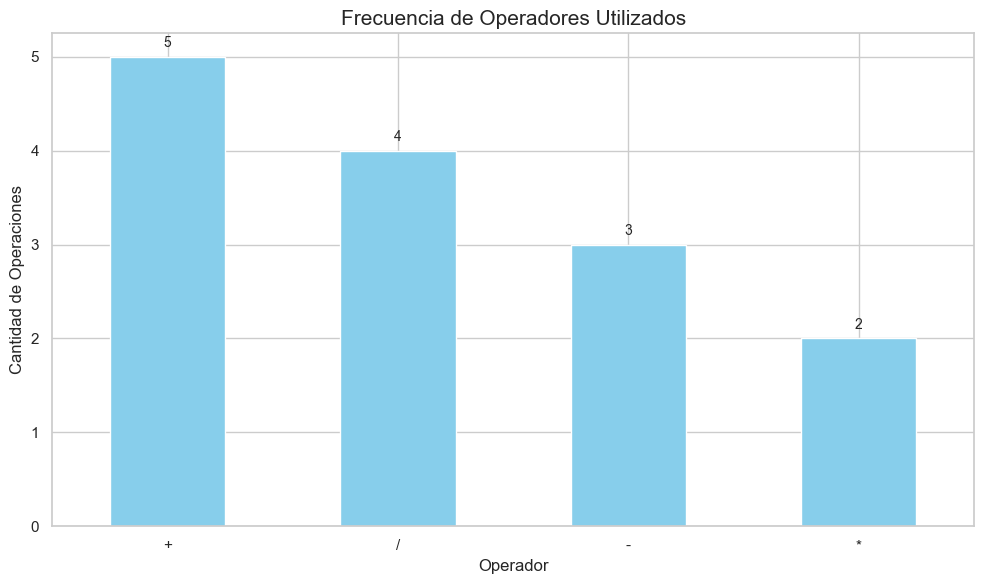

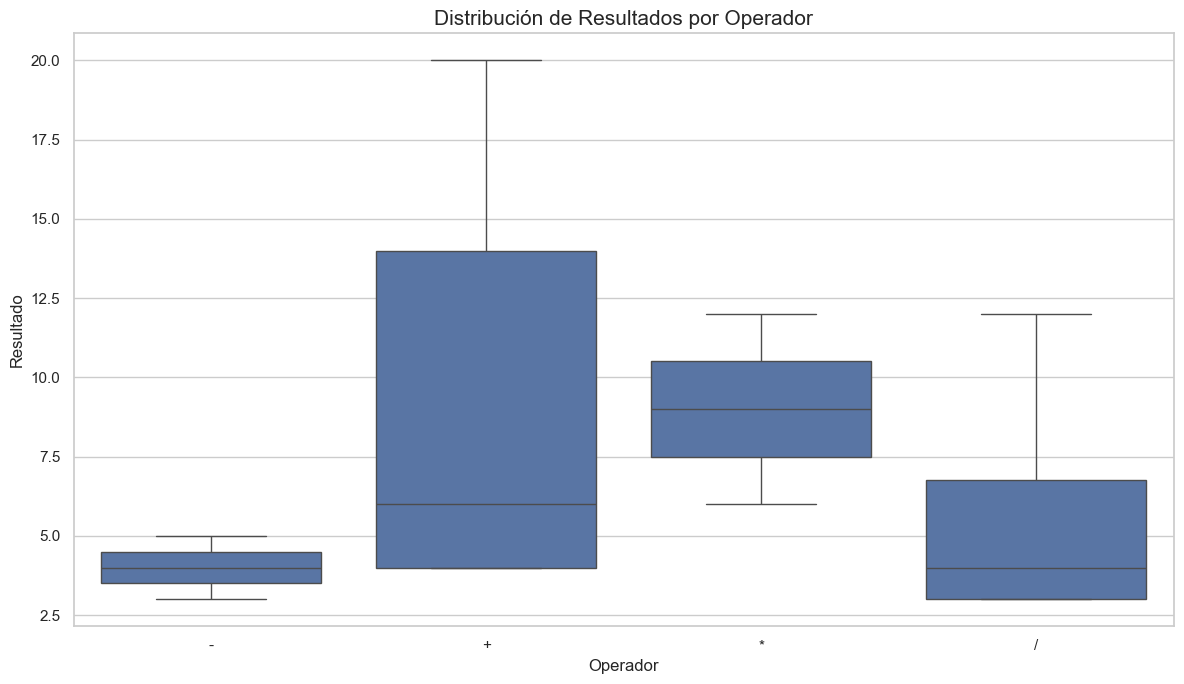


📈 Estadísticas de resultados por operador:


,operador,count,mean,std,min,max
0,*,2,9.0,4.242641,6.0,12.0
1,+,5,9.6,7.127412,4.0,20.0
2,-,3,4.0,1.000000,3.0,5.0
3,/,4,5.75,4.272002,3.0,12.0


In [6]:
# Si tenemos un DataFrame con operaciones, analicemos el uso de operadores
if df is not None and 'operador' in df.columns:
    # Frecuencia de operadores utilizados
    plt.figure(figsize=(10, 6))
    operador_counts = df['operador'].value_counts()
    
    ax = operador_counts.plot(kind='bar', color='skyblue')
    plt.title('Frecuencia de Operadores Utilizados', fontsize=15)
    plt.xlabel('Operador', fontsize=12)
    plt.ylabel('Cantidad de Operaciones', fontsize=12)
    plt.xticks(rotation=0)
    
    # Añadir etiquetas con valores
    for i, v in enumerate(operador_counts):
        ax.text(i, v + 0.1, str(v), ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Resultados por tipo de operación
    if 'resultado' in df.columns:
        plt.figure(figsize=(12, 7))
        
        # Crear un boxplot para ver la distribución de resultados por operador
        sns.boxplot(x='operador', y='resultado', data=df)
        plt.title('Distribución de Resultados por Operador', fontsize=15)
        plt.xlabel('Operador', fontsize=12)
        plt.ylabel('Resultado', fontsize=12)
        
        plt.tight_layout()
        plt.show()
        
        # Calcular estadísticas por operador
        print("\n📈 Estadísticas de resultados por operador:")
        display(df.groupby('operador')['resultado'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index())


⏰ Realizando análisis temporal usando la columna: operacion_creado_en


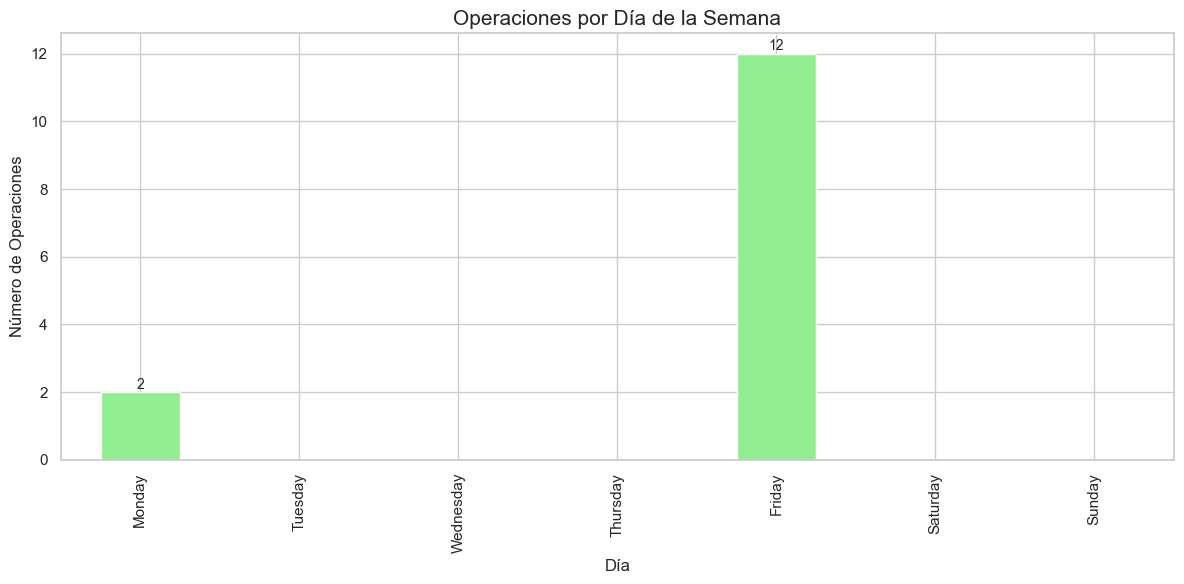

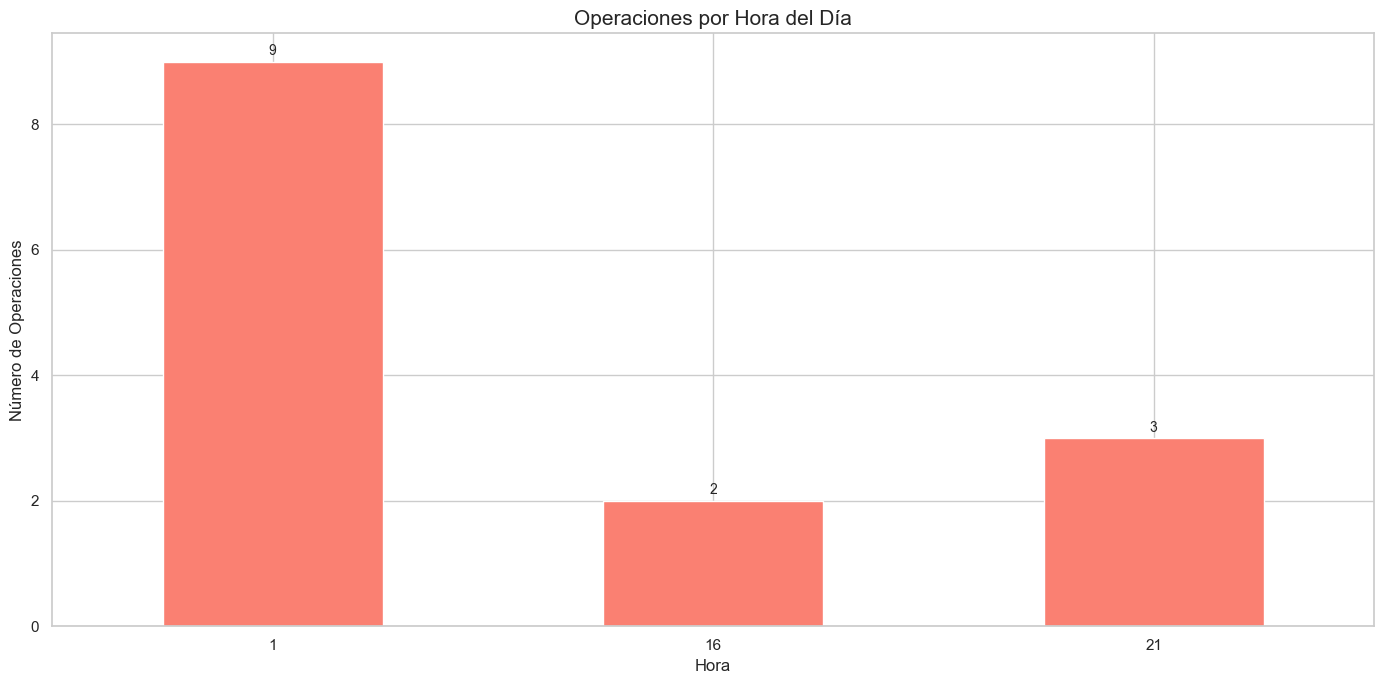

In [7]:
# Análisis temporal si tenemos columna de fecha
fecha_cols = [col for col in df.columns if 'fecha' in col.lower() or 'creado' in col.lower() or 'hora' in col.lower()]

if fecha_cols:
    fecha_col = fecha_cols[0]
    print(f"\n⏰ Realizando análisis temporal usando la columna: {fecha_col}")
    
    # Asegurarnos que la columna esté en formato datetime
    if not pd.api.types.is_datetime64_any_dtype(df[fecha_col]):
        try:
            df[fecha_col] = pd.to_datetime(df[fecha_col])
            print("Columna convertida a datetime")
        except:
            print("No se pudo convertir la columna a formato datetime")
    
    if pd.api.types.is_datetime64_any_dtype(df[fecha_col]):
        # Añadir columnas de año, mes, día y hora para facilitar el análisis
        df['año'] = df[fecha_col].dt.year
        df['mes'] = df[fecha_col].dt.month
        df['día'] = df[fecha_col].dt.day
        df['hora'] = df[fecha_col].dt.hour
        
        # Operaciones por día de la semana
        df['día_semana'] = df[fecha_col].dt.day_name()
        
        plt.figure(figsize=(12, 6))
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_counts = df['día_semana'].value_counts().reindex(day_order)
        
        ax = day_counts.plot(kind='bar', color='lightgreen')
        plt.title('Operaciones por Día de la Semana', fontsize=15)
        plt.xlabel('Día', fontsize=12)
        plt.ylabel('Número de Operaciones', fontsize=12)
        
        # Añadir etiquetas con valores
        for i, v in enumerate(day_counts):
            if not pd.isna(v):  # Verificar que no sea NaN
                ax.text(i, v + 0.1, str(int(v)), ha='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Operaciones por hora del día
        plt.figure(figsize=(14, 7))
        hour_counts = df['hora'].value_counts().sort_index()
        
        ax = hour_counts.plot(kind='bar', color='salmon')
        plt.title('Operaciones por Hora del Día', fontsize=15)
        plt.xlabel('Hora', fontsize=12)
        plt.ylabel('Número de Operaciones', fontsize=12)
        plt.xticks(rotation=0)
        
        # Añadir etiquetas con valores
        for i, v in enumerate(hour_counts):
            ax.text(i, v + 0.1, str(int(v)), ha='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()


👤 Realizando análisis por usuario usando la columna: usuario


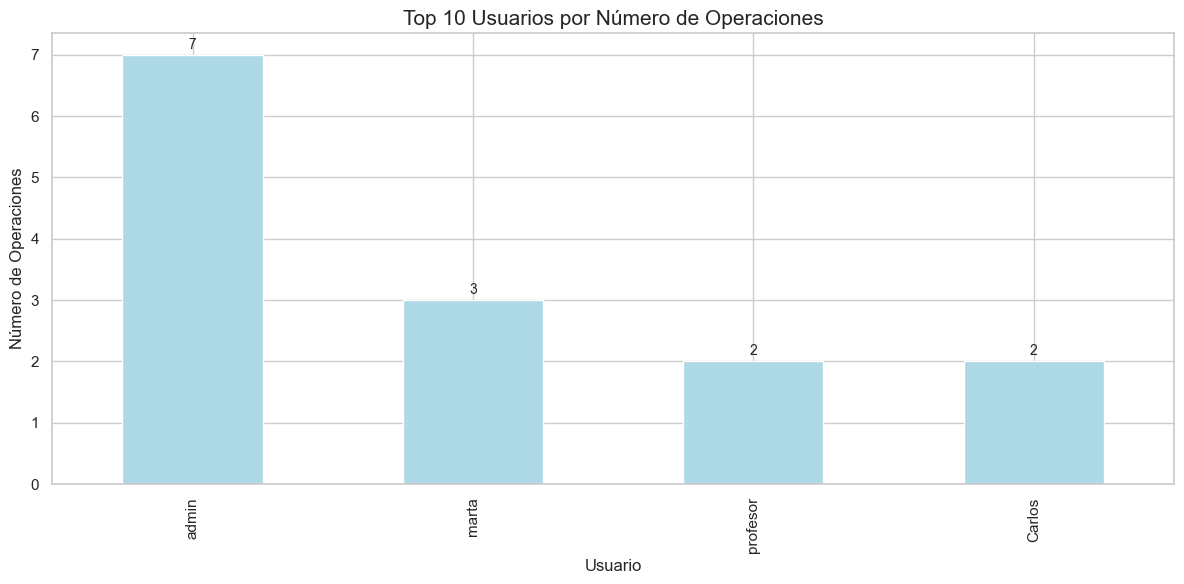

<Figure size 1400x800 with 0 Axes>

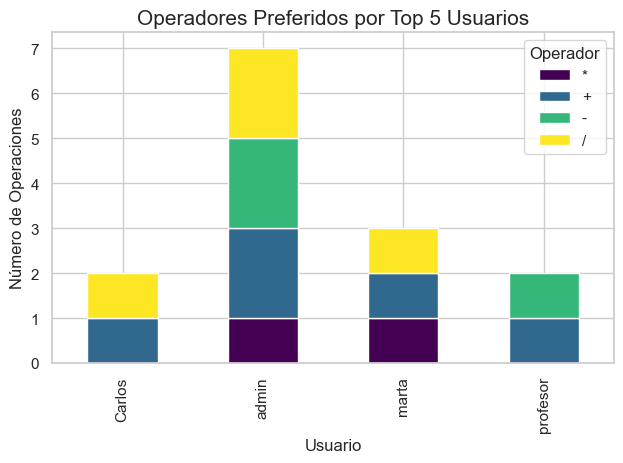

In [8]:
# Análisis por usuario si tenemos esa información
if 'usuario_id' in df.columns or 'usuario' in df.columns:
    usuario_col = 'usuario' if 'usuario' in df.columns else 'usuario_id'
    print(f"\n👤 Realizando análisis por usuario usando la columna: {usuario_col}")
    
    # Top usuarios por número de operaciones
    plt.figure(figsize=(12, 6))
    user_counts = df[usuario_col].value_counts().head(10)  # Top 10 usuarios
    
    ax = user_counts.plot(kind='bar', color='lightblue')
    plt.title('Top 10 Usuarios por Número de Operaciones', fontsize=15)
    plt.xlabel('Usuario', fontsize=12)
    plt.ylabel('Número de Operaciones', fontsize=12)
    
    # Añadir etiquetas con valores
    for i, v in enumerate(user_counts):
        ax.text(i, v + 0.1, str(int(v)), ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de operadores preferidos por usuario (top 5 usuarios)
    if 'operador' in df.columns:
        top_users = df[usuario_col].value_counts().head(5).index.tolist()
        
        plt.figure(figsize=(14, 8))
        user_op_data = df[df[usuario_col].isin(top_users)]
        
        # Crear tabla de contingencia
        crosstab = pd.crosstab(user_op_data[usuario_col], user_op_data['operador'])
        
        # Gráfico de barras apiladas
        crosstab.plot(kind='bar', stacked=True, colormap='viridis')
        plt.title('Operadores Preferidos por Top 5 Usuarios', fontsize=15)
        plt.xlabel('Usuario', fontsize=12)
        plt.ylabel('Número de Operaciones', fontsize=12)
        plt.legend(title='Operador')
        
        plt.tight_layout()
        plt.show()

In [10]:
# Generar un resumen general del análisis
if df is not None:
    print("\n📋 RESUMEN DEL ANÁLISIS")
    print("-" * 50)
    
    # Información básica
    print(f"• Total de registros analizados: {len(df)}")
    
    if 'operador' in df.columns:
        op_stats = df['operador'].value_counts()
        print(f"• Operador más utilizado: {op_stats.index[0]} ({op_stats.iloc[0]} veces)")
    
    if 'resultado' in df.columns:
        print(f"• Resultado promedio: {df['resultado'].mean():.2f}")
        print(f"• Resultado mínimo: {df['resultado'].min():.2f}")
        print(f"• Resultado máximo: {df['resultado'].max():.2f}")
    
    if 'usuario' in df.columns or 'usuario_id' in df.columns:
        usuario_col = 'usuario' if 'usuario' in df.columns else 'usuario_id'
        user_stats = df[usuario_col].value_counts()
        print(f"• Usuario más activo: {user_stats.index[0]} ({user_stats.iloc[0]} operaciones)")
        print(f"• Total de usuarios distintos: {df[usuario_col].nunique()}")
    
    # Fechas
    if fecha_cols:
        fecha_col = fecha_cols[0]
        if pd.api.types.is_datetime64_any_dtype(df[fecha_col]):
            print(f"• Periodo analizado: {df[fecha_col].min().date()} a {df[fecha_col].max().date()}")
            days = (df[fecha_col].max() - df[fecha_col].min()).days
            print(f"• Duración: {days} días")
            print(f"• Promedio de operaciones por día: {len(df)/max(1, days):.2f}")
    
    print("-" * 50)
    print("✨ Análisis exploratorio completado")


📋 RESUMEN DEL ANÁLISIS
--------------------------------------------------
• Total de registros analizados: 14
• Operador más utilizado: + (5 veces)
• Resultado promedio: 7.21
• Resultado mínimo: 3.00
• Resultado máximo: 20.00
• Usuario más activo: admin (7 operaciones)
• Total de usuarios distintos: 4
• Periodo analizado: 2025-03-28 a 2025-03-31
• Duración: 3 días
• Promedio de operaciones por día: 4.67
--------------------------------------------------
✨ Análisis exploratorio completado
